# Importing Necessary Libraries

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import datetime
import math
import calendar
from math import radians
from sklearn.metrics import classification_report, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
import statsmodels.api as sm

## About the Dataset
The dataset is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

## Data Description
    trans_date_trans_time: date and time of the transaction
    cc_num: credit card number of customer
    merchant: customer is paying to which merchant(like Amazon,Walmart) ## category:
    amt: the amount of transaction
    first: first name of customer
    last: last anme of customer
    gender: gender of the customer
    street, city, state: address of the customer
    zip: zip code of the transaction
    lat: latitude of the customer
    long: longitude of customer
    city_pop: population of the city he is living
    job: job of cus
    dob: date of birth of the customer
    trans_num: unique transaction number for each and every
    transaction
    unix_time: time of the transaction in Unix( generally not used in our analysis as it is unique mostly)
    merch_lat: merchant lattitude
    merch_long: merchant longitude
    is_fraud: whether transaction is fraud or no (1- fraud, 0- not fraud)

# `Reading and Understanding the Data`

In [231]:
df_train = pd.read_csv('fraudTrain.csv')
df_train.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [232]:
# Let us check if there are null values in the dataset

df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [233]:
# Including only relevant columns/features in a new dataframe

fraudTrain = df_train[['trans_date_trans_time','amt','gender','lat','long','city_pop','dob','merch_lat','merch_long','is_fraud']]
fraudTrain.head()

trans_date_trans_time     amt gender      lat      long  city_pop  \
0   2019-01-01 00:00:18    4.97      F  36.0788  -81.1781      3495   
1   2019-01-01 00:00:44  107.23      F  48.8878 -118.2105       149   
2   2019-01-01 00:00:51  220.11      M  42.1808 -112.2620      4154   
3   2019-01-01 00:01:16   45.00      M  46.2306 -112.1138      1939   
4   2019-01-01 00:03:06   41.96      M  38.4207  -79.4629        99   

          dob  merch_lat  merch_long  is_fraud  
0  1988-03-09  36.011293  -82.048315         0  
1  1978-06-21  49.159047 -118.186462         0  
2  1962-01-19  43.150704 -112.154481         0  
3  1967-01-12  47.034331 -112.561071         0  
4  1986-03-28  38.674999  -78.632459         0

Please note that category is an important variable and its inclusion in our analysis can help in building a much better model, but for the sake of simplicity we won't include the category feature in our model as it would require creating many dummy variables which is not convenient given the scale of data and the capability of our systems.

In [234]:
# Converting columns to datetime for fraudTrain

fraudTrain.dob = pd.to_datetime(fraudTrain['dob'])
fraudTrain.trans_date_trans_time = pd.to_datetime(fraudTrain['trans_date_trans_time'])

In [235]:
# Creating a new column called Transaction date and converting into datetime

fraudTrain['Transaction_Date'] = pd.to_datetime(fraudTrain['trans_date_trans_time'], format='%Y:%M:%D').dt.date
fraudTrain.Transaction_Date = pd.to_datetime(fraudTrain['Transaction_Date'])

In [236]:
# Creating a new column called Transaction Time

fraudTrain['Transaction_Time'] = pd.to_datetime(fraudTrain['trans_date_trans_time'], format='%Y:%M:%D').dt.time

In [237]:
# Creating a new column called Age

fraudTrain['Age'] = round((fraudTrain['Transaction_Date'] - fraudTrain['dob'])/np.timedelta64(1, 'Y'))
fraudTrain.Age = fraudTrain.Age.astype('int')

In [238]:
# Creating a function to calculate the Day of Week

def DoW(x):
    day = datetime.datetime.weekday(x)
    return (calendar.day_name[day])

fraudTrain['Day_of_Week'] = fraudTrain['Transaction_Date'].apply(DoW)

In [239]:
fraudTrain.head()

trans_date_trans_time     amt gender      lat      long  city_pop  \
0   2019-01-01 00:00:18    4.97      F  36.0788  -81.1781      3495   
1   2019-01-01 00:00:44  107.23      F  48.8878 -118.2105       149   
2   2019-01-01 00:00:51  220.11      M  42.1808 -112.2620      4154   
3   2019-01-01 00:01:16   45.00      M  46.2306 -112.1138      1939   
4   2019-01-01 00:03:06   41.96      M  38.4207  -79.4629        99   

         dob  merch_lat  merch_long  is_fraud Transaction_Date  \
0 1988-03-09  36.011293  -82.048315         0       2019-01-01   
1 1978-06-21  49.159047 -118.186462         0       2019-01-01   
2 1962-01-19  43.150704 -112.154481         0       2019-01-01   
3 1967-01-12  47.034331 -112.561071         0       2019-01-01   
4 1986-03-28  38.674999  -78.632459         0       2019-01-01   

  Transaction_Time  Age Day_of_Week  
0         00:00:18   31     Tuesday  
1         00:00:44   41     Tuesday  
2         00:00:51   57     Tuesday  
3         00:01:16   52     Tuesday  
4         00:03:06   33     Tuesday

In [240]:
# # Creating a new column Month 

fraudTrain['Month'] = pd.DatetimeIndex(fraudTrain.trans_date_trans_time).month

fraudTrain['Month'] = fraudTrain['Month'].map({1:'Jan', 2: 'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun', 7:'Jul',
                                             8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})


# Making Gender column binary

fraudTrain['gender'] = fraudTrain['gender'].map({'F':1, 'M':0})


In [241]:
# Creating a function to calculate the distance between customer's base location and merchant location

def haversineDistance(lat1,lon1,lat2,lon2):
    Lat_Dist = radians(lat2 - lat1)
    Long_Dist = radians(lon2 - lon1)

    ans = (pow(math.sin(Lat_Dist / 2), 2) + pow(math.sin(Long_Dist / 2), 2) * math.cos(lat1) * math.cos(lat2));
    radius = 6371
    cal = 2 * math.asin(math.sqrt(ans))
    return radius * cal

Dist = []
for a,b,c,d in zip(fraudTrain['lat'], fraudTrain['long'], fraudTrain['merch_lat'], fraudTrain['merch_long']):
    Dist.append(haversineDistance(a,b,c,d))
    
fraudTrain['Dist'] = Dist
fraudTrain.head()

trans_date_trans_time     amt  gender      lat      long  city_pop  \
0   2019-01-01 00:00:18    4.97       1  36.0788  -81.1781      3495   
1   2019-01-01 00:00:44  107.23       1  48.8878 -118.2105       149   
2   2019-01-01 00:00:51  220.11       0  42.1808 -112.2620      4154   
3   2019-01-01 00:01:16   45.00       0  46.2306 -112.1138      1939   
4   2019-01-01 00:03:06   41.96       0  38.4207  -79.4629        99   

         dob  merch_lat  merch_long  is_fraud Transaction_Date  \
0 1988-03-09  36.011293  -82.048315         0       2019-01-01   
1 1978-06-21  49.159047 -118.186462         0       2019-01-01   
2 1962-01-19  43.150704 -112.154481         0       2019-01-01   
3 1967-01-12  47.034331 -112.561071         0       2019-01-01   
4 1986-03-28  38.674999  -78.632459         0       2019-01-01   

  Transaction_Time  Age Day_of_Week Month        Dist  
0         00:00:18   31     Tuesday   Jan   10.509708  
1         00:00:44   41     Tuesday   Jan   30.171468  
2         00:00:51   57     Tuesday   Jan  107.746268  
3         00:01:16   52     Tuesday   Jan   97.629363  
4         00:03:06   33     Tuesday   Jan   66.236025

In [242]:
# Dropping unnecessay columns

fraudTrain.drop(['trans_date_trans_time','Transaction_Date','Transaction_Time','dob', 
                 'lat','long', 'merch_lat','merch_long'], axis=1, inplace=True)
fraudTrain.head()

amt  gender  city_pop  is_fraud  Age Day_of_Week Month        Dist
0    4.97       1      3495         0   31     Tuesday   Jan   10.509708
1  107.23       1       149         0   41     Tuesday   Jan   30.171468
2  220.11       0      4154         0   57     Tuesday   Jan  107.746268
3   45.00       0      1939         0   52     Tuesday   Jan   97.629363
4   41.96       0        99         0   33     Tuesday   Jan   66.236025

In [243]:
# Reading the test dataset

df_test = pd.read_csv('fraudTest.csv')
df_test.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2     Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3  Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4    Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   

   city_pop                     job         dob  \
0    333497     Mechanical engineer  1968-03-19   
1       302  Sales professional, IT  1990-01-17   
2     34496       Librarian, public  1970-10-21   
3     54767            Set designer  1987-07-25   
4      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [244]:
# Considering only the relevant columns/features in a new dataframe

fraudTest = df_test[['trans_date_trans_time','amt','gender','lat','long','city_pop','dob','merch_lat','merch_long','is_fraud']]
fraudTest.head()

trans_date_trans_time    amt gender      lat      long  city_pop  \
0   2020-06-21 12:14:25   2.86      M  33.9659  -80.9355    333497   
1   2020-06-21 12:14:33  29.84      F  40.3207 -110.4360       302   
2   2020-06-21 12:14:53  41.28      F  40.6729  -73.5365     34496   
3   2020-06-21 12:15:15  60.05      M  28.5697  -80.8191     54767   
4   2020-06-21 12:15:17   3.19      M  44.2529  -85.0170      1126   

          dob  merch_lat  merch_long  is_fraud  
0  1968-03-19  33.986391  -81.200714         0  
1  1990-01-17  39.450498 -109.960431         0  
2  1970-10-21  40.495810  -74.196111         0  
3  1987-07-25  28.812398  -80.883061         0  
4  1955-07-06  44.959148  -85.884734         0

In [245]:
# Converting columns to datetime for fraudTest

fraudTest.dob = pd.to_datetime(fraudTest['dob'])
fraudTest.trans_date_trans_time = pd.to_datetime(fraudTest['trans_date_trans_time'])

In [246]:
# Creating a new column called Transaction date and converting into datetime

fraudTest['Transaction_Date'] = pd.to_datetime(fraudTest['trans_date_trans_time'], format='%Y:%M:%D').dt.date
fraudTest.Transaction_Date = pd.to_datetime(fraudTest['Transaction_Date'])

In [247]:
# Creating a new column called Transaction Time

fraudTest['Transaction_Time'] = pd.to_datetime(fraudTest['trans_date_trans_time'], format='%Y:%M:%D').dt.time

In [248]:
# Creating a new column called Age

fraudTest['Age'] = round((fraudTest['Transaction_Date'] - fraudTest['dob'])/np.timedelta64(1, 'Y'))
fraudTest.Age = fraudTest.Age.astype('int')

In [249]:
# Calling the function created earlier to calculate the Day of the Week 

fraudTest['Day_of_Week'] = fraudTest['Transaction_Date'].apply(DoW)

In [250]:
fraudTest.head()

trans_date_trans_time    amt gender      lat      long  city_pop        dob  \
0   2020-06-21 12:14:25   2.86      M  33.9659  -80.9355    333497 1968-03-19   
1   2020-06-21 12:14:33  29.84      F  40.3207 -110.4360       302 1990-01-17   
2   2020-06-21 12:14:53  41.28      F  40.6729  -73.5365     34496 1970-10-21   
3   2020-06-21 12:15:15  60.05      M  28.5697  -80.8191     54767 1987-07-25   
4   2020-06-21 12:15:17   3.19      M  44.2529  -85.0170      1126 1955-07-06   

   merch_lat  merch_long  is_fraud Transaction_Date Transaction_Time  Age  \
0  33.986391  -81.200714         0       2020-06-21         12:14:25   52   
1  39.450498 -109.960431         0       2020-06-21         12:14:33   30   
2  40.495810  -74.196111         0       2020-06-21         12:14:53   50   
3  28.812398  -80.883061         0       2020-06-21         12:15:15   33   
4  44.959148  -85.884734         0       2020-06-21         12:15:17   65   

  Day_of_Week  
0      Sunday  
1      Sunday  
2      Sunday  
3      Sunday  
4      Sunday

In [251]:
# Creating a new column Month

fraudTest['Month'] = pd.DatetimeIndex(fraudTest.trans_date_trans_time).month

fraudTest['Month'] = fraudTest['Month'].map({1:'Jan', 2: 'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun', 7:'Jul',
                                             8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})


# Making Gender column binary

fraudTest['gender'] = fraudTest['gender'].map({'F':1, 'M':0})




In [252]:
# Calling the function created earlier to calculate the Distance between the customer's home location and
# the location of transactions (fraudulent or otherwise)

Dist2 = []
for a,b,c,d in zip(fraudTest['lat'], fraudTest['long'], fraudTest['merch_lat'], fraudTest['merch_long']):
    Dist2.append(haversineDistance(a,b,c,d))

In [253]:
# Adding the calculated Distance column in the test dataframe

fraudTest['Dist'] = Dist2
fraudTest.head()

trans_date_trans_time    amt  gender      lat      long  city_pop  \
0   2020-06-21 12:14:25   2.86       0  33.9659  -80.9355    333497   
1   2020-06-21 12:14:33  29.84       1  40.3207 -110.4360       302   
2   2020-06-21 12:14:53  41.28       1  40.6729  -73.5365     34496   
3   2020-06-21 12:15:15  60.05       0  28.5697  -80.8191     54767   
4   2020-06-21 12:15:17   3.19       0  44.2529  -85.0170      1126   

         dob  merch_lat  merch_long  is_fraud Transaction_Date  \
0 1968-03-19  33.986391  -81.200714         0       2020-06-21   
1 1990-01-17  39.450498 -109.960431         0       2020-06-21   
2 1970-10-21  40.495810  -74.196111         0       2020-06-21   
3 1987-07-25  28.812398  -80.883061         0       2020-06-21   
4 1955-07-06  44.959148  -85.884734         0       2020-06-21   

  Transaction_Time  Age Day_of_Week Month        Dist  
0         12:14:25   52      Sunday   Jun   24.748687  
1         12:14:33   30      Sunday   Jun   98.988771  
2         12:14:53   50      Sunday   Jun   73.344386  
3         12:15:15   33      Sunday   Jun   27.746011  
4         12:15:17   65      Sunday   Jun  105.772207

In [254]:
# Dropping unnecessary columns

fraudTest.drop(['trans_date_trans_time','Transaction_Date','Transaction_Time','dob', 
                 'lat','long', 'merch_lat','merch_long'], axis=1, inplace=True)


In [255]:
fraudTest.head()

amt  gender  city_pop  is_fraud  Age Day_of_Week Month        Dist
0   2.86       0    333497         0   52      Sunday   Jun   24.748687
1  29.84       1       302         0   30      Sunday   Jun   98.988771
2  41.28       1     34496         0   50      Sunday   Jun   73.344386
3  60.05       0     54767         0   33      Sunday   Jun   27.746011
4   3.19       0      1126         0   65      Sunday   Jun  105.772207

In [256]:
colors = ['lightblue', 'darkred']
labels = ['Normal','Fraud']
values = fraudTrain['is_fraud'].value_counts()/fraudTrain['is_fraud'].shape[0]
fig = go.Figure(data=[go.Pie(labels = labels,
                             values=values,hole=.3)])

fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Credit Card Fraud", height=500, width=500
)
fig.show()

The transaction dataset contains approximately 0.6% fraudulent transactions which shows there is imbalance in dataset and will have to be treated with sampling methods.

# `Exploratory Data Analysis`

We will perform the EDA mostly on fraud transactions only and for some corelations on the entire dataset

In [257]:
fraud_cases = fraudTrain[fraudTrain['is_fraud'] == 1]
fraud_cases.describe()

amt       gender      city_pop  is_fraud          Age  \
count  7506.000000  7506.000000  7.506000e+03    7506.0  7506.000000   
mean    531.320092     0.497602  9.727676e+04       1.0    48.794698   
std     390.560070     0.500028  3.265815e+05       0.0    18.866665   
min       1.060000     0.000000  2.300000e+01       1.0    14.000000   
25%     245.662500     0.000000  7.465000e+02       1.0    33.000000   
50%     396.505000     0.000000  2.623000e+03       1.0    48.000000   
75%     900.875000     1.000000  2.143700e+04       1.0    61.000000   
max    1376.040000     1.000000  2.906700e+06       1.0    94.000000   

              Dist  
count  7506.000000  
mean     70.482087  
std      30.306340  
min       0.740334  
25%      47.400129  
50%      72.936782  
75%      95.072128  
max     144.472575

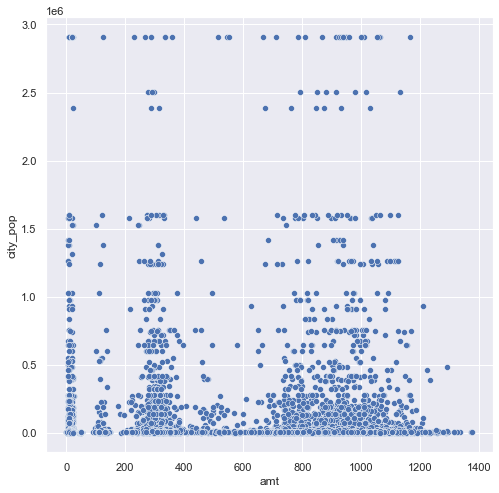

In [258]:
plt.figure(figsize = (8,8))
sns.scatterplot(data = fraudTrain[fraudTrain['is_fraud'] == 1], x = 'amt', y = 'city_pop')
plt.show()

- No clear relation between city population and the amount of spending

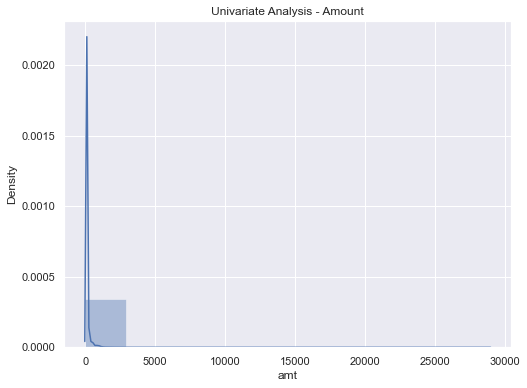

In [259]:
plt.figure(figsize = [8,6])
sns.set_theme()
sns.distplot(fraudTrain['amt'], bins = 10, kde = True)
plt.title('Univariate Analysis - Amount')
plt.show()

- As the kernel density function clearly shows major skewness, treating the variable amt with log transformations

In [260]:
fraudTrain['amt'] = np.log(fraudTrain['amt'])

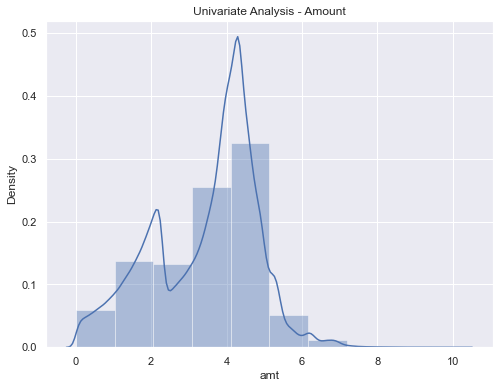

In [261]:
plt.figure(figsize = [8,6])
sns.set_theme()
sns.distplot(fraudTrain['amt'], bins = 10, kde = True)
plt.title('Univariate Analysis - Amount')
plt.show()

- Skewness is treated

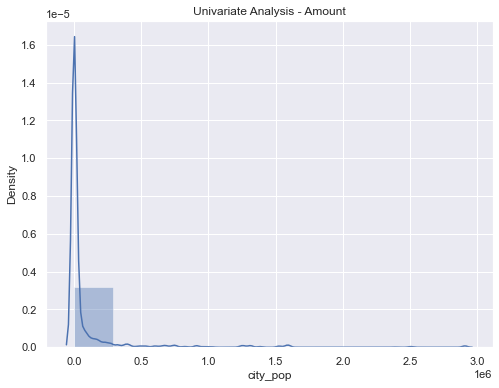

In [262]:
plt.figure(figsize = [8,6])
sns.set_theme()
sns.distplot(fraudTrain['city_pop'], bins = 10, kde = True)
plt.title('Univariate Analysis - Amount')
plt.show()

- As the kernel density function clearly shows major skewness, treating the variable city_pop with log transformations

In [263]:
fraudTrain['city_pop'] = np.log(fraudTrain['city_pop'])

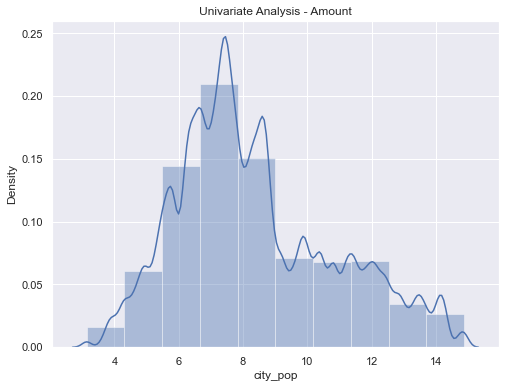

In [264]:
plt.figure(figsize = [8,6])
sns.set_theme()
sns.distplot(fraudTrain['city_pop'], bins = 10, kde = True)
plt.title('Univariate Analysis - Amount')
plt.show()

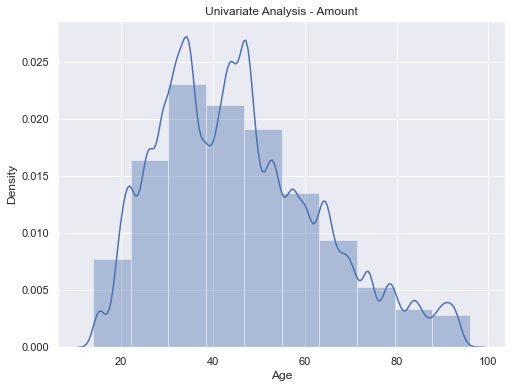

In [265]:
plt.figure(figsize = [8,6])
sns.set_theme()
sns.distplot(fraudTrain['Age'], bins = 10, kde = True)
plt.title('Univariate Analysis - Amount')
plt.show()

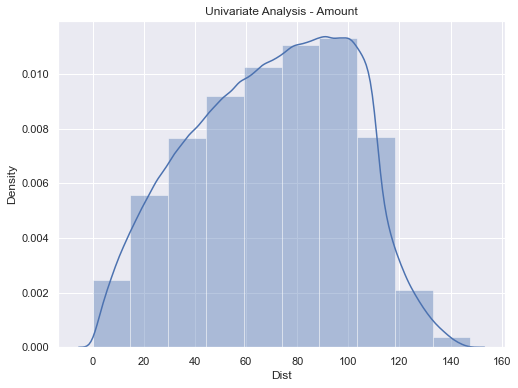

In [266]:
plt.figure(figsize = [8,6])
sns.set_theme()
sns.distplot(fraudTrain['Dist'], bins = 10, kde = True)
plt.title('Univariate Analysis - Amount')
plt.show()

- No major skewness found in Distance and Age variables

In [267]:
#Adjusting the skewness of Test set for amt and cit_pop variable
fraudTest['amt'] = np.log(fraudTest['amt'])
fraudTest['city_pop'] = np.log(fraudTest['city_pop'])

<AxesSubplot:>

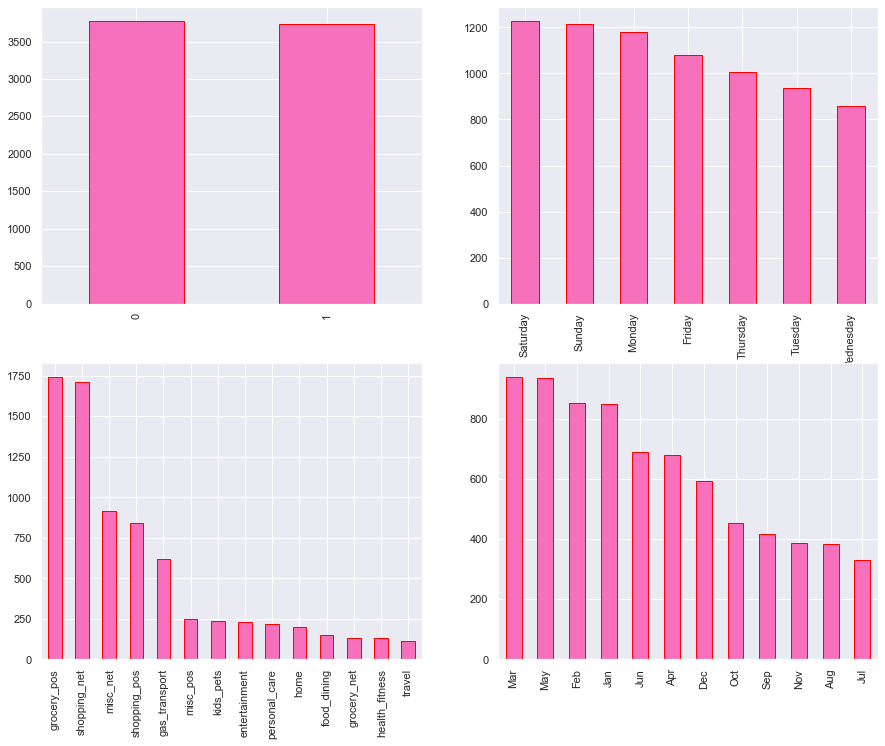

In [268]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
random_color = np.random.rand(3,)
fraud_cases['gender'].value_counts().plot.bar(color=random_color, edgecolor='red')
plt.subplot(2,2,2)
fraud_cases['Day_of_Week'].value_counts().plot.bar(color=random_color, edgecolor='red')
plt.subplot(2,2,3)
df[df['is_fraud']==1]['category'].value_counts().plot.bar(color=random_color, edgecolor='red')
plt.subplot(2,2,4)
fraud_cases['Month'].value_counts().plot.bar(color=random_color, edgecolor='red')

    1.The frauds in credit cards is almost the same for Males and females.
    2.Credit card fraud is dominant for grocery payments followed by online shopping payments and the least for travel payments.
    3.Most of the fraud transactions take place on weekends.
    4.December has the highest number of transactions and February has the lowest, which follows logical deduction, December being a holiday season.

    Most of the transactions take place on Monday followed by Sunday, which is a bit counter-intuitive, since we expected the most transactions to be on weekends (Saturday/Sunday). However, it can be brushed aside by the fact that this is a synthesized dataset.

<AxesSubplot:>

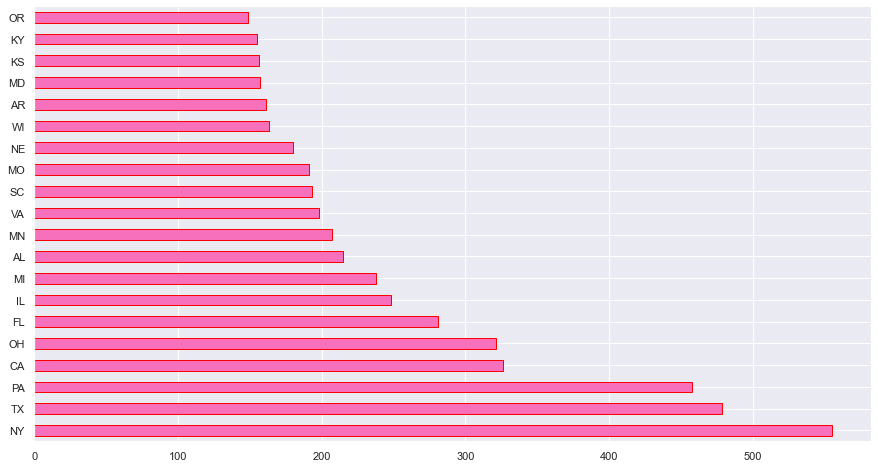

In [269]:
plt.figure(figsize=(15,8))
df[df['is_fraud']==1]['state'].value_counts().head(20).plot.barh(color=random_color, edgecolor='red')



<AxesSubplot:>

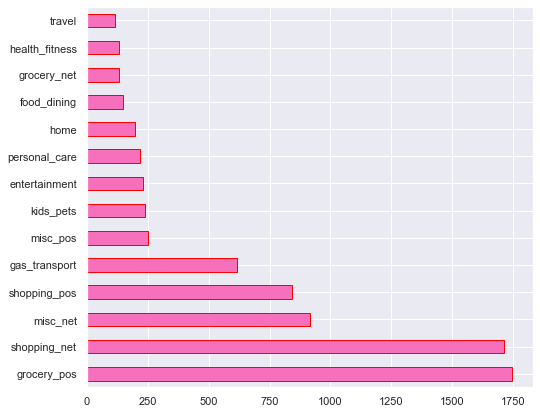

In [270]:
plt.figure(figsize=(8,7))
df[df['is_fraud']==1]['category'].value_counts().head(20).plot.barh(color=random_color, edgecolor='red')

    1.The largest number of fraud transactions take place in NY state, followed by TX and PA.
    2.The category ‘Travel’ has a low percentage of fraudulent transactions, whereas the category ‘Grocery_Pos’ and ‘Shopping_Net’ has a high percentage of fraudulent transactions.

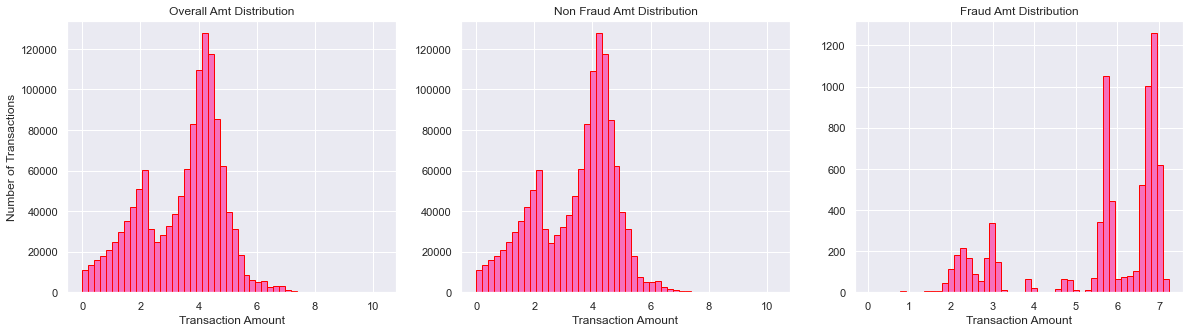

In [271]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(fraudTrain[fraudTrain['amt']<=1500]['amt'], bins=50, color=random_color, edgecolor='red')
ax[1].hist(fraudTrain[(fraudTrain['is_fraud']==0) & (fraudTrain['amt']<=1500)]['amt'], bins=50, color=random_color, edgecolor='red')
ax[2].hist(fraudTrain[(fraudTrain['is_fraud']==1) & (fraudTrain['amt']<=1500)]['amt'], bins=50, color=random_color, edgecolor='red')

ax[0].set_title('Overall Amt Distribution')
ax[1].set_title('Non Fraud Amt Distribution')
ax[2].set_title('Fraud Amt Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('Number of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

It can be noted that the overall transaction and non fradulent transactions are mostly of low amounts, howerver fradulent transactions are mostly of higher amounts. Thus it becomes imperative to detect and stop these transactions

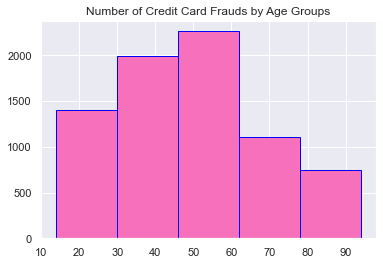

In [272]:
fig, ax = plt.subplots()
ax.hist(fraud_cases.Age, color=random_color, edgecolor='blue', bins = 5)
plt.title("Number of Credit Card Frauds by Age Groups")
plt.show()

Age group of 45-60 are mostly prone to fradulent transactions. This can be related to unawareness of security measures taken by the user at higher age groups.

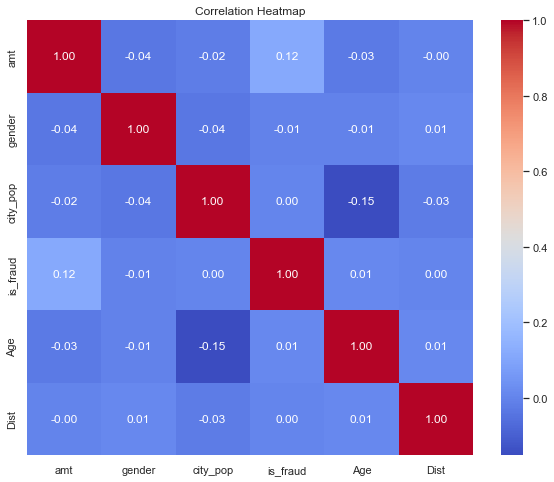

In [273]:
correlation_matrix = fraudTrain.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Corelation Matrix shows selection of features for model building is good as they are having low corelation values thus reducing the potential problem of multicollinearity

## One-Hot Encoding

In [274]:
#Combining the training and test data temporarily
fraudTrain['is_train_set'] = True
fraudTest['is_train_set'] = False
combined_data = pd.concat([fraudTrain, fraudTest], axis=0)

In [275]:
# Identifying all unique categorical values across both datasets
categorical_cols = ['Day_of_Week','Month']

In [276]:
# Applying one-hot encoding to the combined dataset to ensure all possible categories are represented
for col_name in categorical_cols:
    new_df = pd.get_dummies(combined_data[col_name], prefix = col_name, drop_first = True)
    combined_data = pd.concat([combined_data, new_df], axis = 1)
    combined_data.drop(col_name, axis = 1, inplace = True)

In [277]:
# Spliting the combined dataset back into the original training and test sets
fraudTrain = combined_data[combined_data['is_train_set'] == True].drop('is_train_set', axis=1)
fraudTest = combined_data[combined_data['is_train_set'] == False].drop('is_train_set', axis=1)

In [278]:
fraudTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   amt                    1296675 non-null  float64
 1   gender                 1296675 non-null  int64  
 2   city_pop               1296675 non-null  float64
 3   is_fraud               1296675 non-null  int64  
 4   Age                    1296675 non-null  int32  
 5   Dist                   1296675 non-null  float64
 6   Day_of_Week_Monday     1296675 non-null  uint8  
 7   Day_of_Week_Saturday   1296675 non-null  uint8  
 8   Day_of_Week_Sunday     1296675 non-null  uint8  
 9   Day_of_Week_Thursday   1296675 non-null  uint8  
 10  Day_of_Week_Tuesday    1296675 non-null  uint8  
 11  Day_of_Week_Wednesday  1296675 non-null  uint8  
 12  Month_Aug              1296675 non-null  uint8  
 13  Month_Dec              1296675 non-null  uint8  
 14  Month_Feb         

In [279]:
fraudTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   amt                    555719 non-null  float64
 1   gender                 555719 non-null  int64  
 2   city_pop               555719 non-null  float64
 3   is_fraud               555719 non-null  int64  
 4   Age                    555719 non-null  int32  
 5   Dist                   555719 non-null  float64
 6   Day_of_Week_Monday     555719 non-null  uint8  
 7   Day_of_Week_Saturday   555719 non-null  uint8  
 8   Day_of_Week_Sunday     555719 non-null  uint8  
 9   Day_of_Week_Thursday   555719 non-null  uint8  
 10  Day_of_Week_Tuesday    555719 non-null  uint8  
 11  Day_of_Week_Wednesday  555719 non-null  uint8  
 12  Month_Aug              555719 non-null  uint8  
 13  Month_Dec              555719 non-null  uint8  
 14  Month_Feb              555719 non-nu

# `Train/Test Data Splitting`

In [280]:
y = fraudTrain.pop('is_fraud')
X = fraudTrain

In [281]:
from sklearn import model_selection

# To handle data imbalance while splitting, using the stratify method

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify = y, random_state=42)

In [282]:
#Confirming shapes of the test and train datasets

X_train.shape, X_test.shape

((972506, 22), (324169, 22))

## Scaling of variables for Logistic Regression

In [283]:
fraudTrain.columns

Index(['amt', 'gender', 'city_pop', 'Age', 'Dist', 'Day_of_Week_Monday',
       'Day_of_Week_Saturday', 'Day_of_Week_Sunday', 'Day_of_Week_Thursday',
       'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep'],
      dtype='object')

In [284]:
# Making a copy of the X_train and scaling it as that is specific only to Logistic Regression

X_train_lr = X_train.copy()

scaler = MinMaxScaler()
X_train_lr[['amt', 'gender', 'city_pop', 'Age', 'Dist']] = scaler.fit_transform(X_train[['amt','gender', 'city_pop', 'Age', 'Dist']])
X_train_lr.head()

amt  gender  city_pop       Age      Dist  Day_of_Week_Monday  \
267436  0.482372     0.0  0.448670  0.353659  0.376031                   0   
233159  0.251400     1.0  0.230283  0.463415  0.642221                   0   
430072  0.441626     0.0  0.470635  0.560976  0.718947                   0   
236662  0.474693     1.0  0.698418  0.414634  0.510120                   0   
450357  0.462170     0.0  0.477590  0.841463  0.540952                   0   

        Day_of_Week_Saturday  Day_of_Week_Sunday  Day_of_Week_Thursday  \
267436                     0                   1                     0   
233159                     1                   0                     0   
430072                     0                   0                     0   
236662                     0                   1                     0   
450357                     0                   0                     0   

        Day_of_Week_Tuesday  ...  Month_Dec  Month_Feb  Month_Jan  Month_Jul  \
267436                    0  ...          0          0          0          0   
233159                    0  ...          0          0          0          0   
430072                    0  ...          0          0          0          1   
236662                    0  ...          0          0          0          0   
450357                    0  ...          0          0          0          1   

        Month_Jun  Month_Mar  Month_May  Month_Nov  Month_Oct  Month_Sep  
267436          0          0          1          0          0          0  
233159          0          0          0          0          0          0  
430072          0          0          0          0          0          0  
236662          0          0          0          0          0          0  
450357          0          0          0          0          0          0  

[5 rows x 22 columns]

In [285]:
# Confirming if scaling has worked

X_train_lr.describe()

amt         gender       city_pop            Age  \
count  972506.000000  972506.000000  972506.000000  972506.000000   
mean        0.338391       0.546699       0.444523       0.390205   
std         0.135778       0.497815       0.208761       0.212136   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.221962       0.000000       0.295607       0.231707   
50%         0.377921       1.000000       0.397163       0.365854   
75%         0.432530       1.000000       0.577530       0.524390   
max         1.000000       1.000000       1.000000       1.000000   

                Dist  Day_of_Week_Monday  Day_of_Week_Saturday  \
count  972506.000000       972506.000000         972506.000000   
mean        0.473872            0.196180              0.155041   
std         0.206361            0.397106              0.361944   
min         0.000000            0.000000              0.000000   
25%         0.314929            0.000000              0.000000   
50%         0.488222            0.000000              0.000000   
75%         0.640732            0.000000              0.000000   
max         1.000000            1.000000              1.000000   

       Day_of_Week_Sunday  Day_of_Week_Thursday  Day_of_Week_Tuesday  ...  \
count       972506.000000         972506.000000        972506.000000  ...   
mean             0.193239              0.113608             0.123502  ...   
std              0.394839              0.317334             0.329012  ...   
min              0.000000              0.000000             0.000000  ...   
25%              0.000000              0.000000             0.000000  ...   
50%              0.000000              0.000000             0.000000  ...   
75%              0.000000              0.000000             0.000000  ...   
max              1.000000              1.000000             1.000000  ...   

           Month_Dec      Month_Feb      Month_Jan      Month_Jul  \
count  972506.000000  972506.000000  972506.000000  972506.000000   
mean        0.108675       0.075192       0.080739       0.066888   
std         0.311231       0.263702       0.272434       0.249828   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

           Month_Jun      Month_Mar      Month_May      Month_Nov  \
count  972506.000000  972506.000000  972506.000000  972506.000000   
mean        0.111121       0.110575       0.113506       0.054308   
std         0.314282       0.313605       0.317210       0.226625   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

           Month_Oct      Month_Sep  
count  972506.000000  972506.000000  
mean        0.052955       0.054654  
std         0.223944       0.227303  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000  

[8 rows x 22 columns]

# `Model Building and Hyperparameter Tuning`

The algorithms that will be used in order to create classification models that would be sensitive to detecting fraudulent transactions are:
- Logistic Regression
- Decision Trees
- Random Forest

Each algorithm will have an unsampled model and will then be compared by using sampling methods - SMOTE and ADASYN
Let us proceed with the model building part in the order mentioned above:

## 1.1 Logistic Regression - Unsampled

In [286]:
logreg_unsampled = LogisticRegression().fit(X_train_lr,y_train)

#### Hyperparameter tuning using Grid Search CV

In [287]:
from sklearn.model_selection import GridSearchCV

In [288]:
params_lr = {
    'C': np.logspace(-3,3,7),
    'penalty': ['l2']
}

grid_search_1 = GridSearchCV(estimator=logreg_unsampled,
                    param_grid=params_lr,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [289]:
%%time
grid_search_1.fit(X_train_lr, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
CPU times: total: 2.86 s
Wall time: 39.6 s


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2']},
             scoring='recall', verbose=1)

In [290]:
grid_search_1.best_score_

0.0

# `Model Evaluation` 
The metric used to evaluate the models is - Recall
- Recall attempts to answer the following question: What proportion of actual positives was identified correctly?
- Mathematically, recall is defined as:

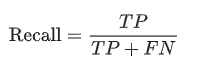

In [291]:
def evaluate_model_lr_unsampled(classifier):
    y_train_pred = classifier.predict(X_train_lr)
    y_test_pred = classifier.predict(X_test)
    
    print('Train set performance:')
    print(metrics.recall_score(y_train, y_train_pred))
    print(metrics.confusion_matrix(y_train, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(metrics.recall_score(y_test, y_test_pred))
    print(metrics.confusion_matrix(y_test, y_test_pred))

In [292]:
lr_unsampled = grid_search_1.best_estimator_
evaluate_model_lr_unsampled(lr_unsampled)

Train set performance:
0.0
[[966877      0]
 [  5629      0]]
-------------------------
Test set performance:
0.9989344698987747
[[  3019 319273]
 [     2   1875]]


#### ROC Curve

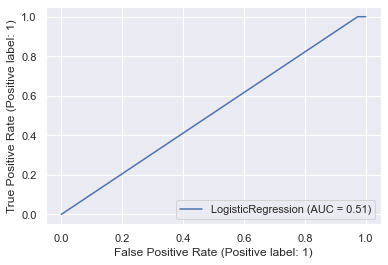

In [293]:
metrics.plot_roc_curve(logreg_unsampled, X_test, y_test)

#### Metrics for Logistic Regression - Unsampled: 
- Recall on Train: 0.0
- Recall on Test: 1.0
- Area Under the Curve: 0.51

## Let us try out two sampling methods - SMOTE and ADASYN

In [294]:
from imblearn.over_sampling import SMOTE, ADASYN
X_train_smote_lr, y_train_smote_lr = SMOTE().fit_resample(X_train_lr, y_train)
X_train_adasyn_lr, y_train_adasyn_lr = ADASYN().fit_resample(X_train_lr, y_train)

## 1.2 Logistic Regression with SMOTE

In [295]:
logreg_smote = LogisticRegression().fit(X_train_smote_lr,y_train_smote_lr)

In [296]:
params_lr = {
    'C': np.logspace(-3,3,7),
    'penalty': ['l2']
}

grid_search_2 = GridSearchCV(estimator=logreg_smote,
                    param_grid=params_lr,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [297]:
%%time
grid_search_2.fit(X_train_smote_lr, y_train_smote_lr)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
CPU times: total: 9.91 s
Wall time: 57.1 s


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2']},
             scoring='recall', verbose=1)

In [298]:
grid_search_2.best_score_

0.7973185843728651

In [299]:
def evaluate_model_lr_smote(classifier):
    y_train_pred = classifier.predict(X_train_smote_lr)
    y_test_pred = classifier.predict(X_test)
    
    print('Train set performance:')
    print(metrics.recall_score(y_train_smote_lr, y_train_pred))
    print(metrics.confusion_matrix(y_train_smote_lr, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(metrics.recall_score(y_test, y_test_pred))
    print(metrics.confusion_matrix(y_test, y_test_pred))

In [300]:
lr_smote = grid_search_2.best_estimator_
evaluate_model_lr_smote(lr_smote)

Train set performance:
0.7972120548942626
[[788680 178197]
 [196071 770806]]
-------------------------
Test set performance:
1.0
[[     0 322292]
 [     0   1877]]


#### ROC Curve

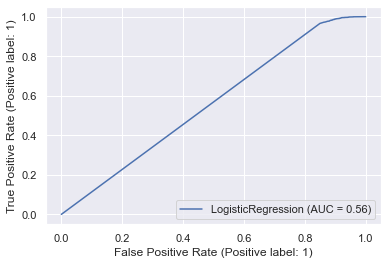

In [301]:
metrics.plot_roc_curve(logreg_smote, X_test, y_test)

#### Metrics for Logistic Regression - SMOTE: 
- Recall on Train: 0.80
- Recall on Test: 1.00
- Area Under the Curve: 0.56

## 1.3 Logistic Regression with ADASYN

In [302]:
logreg_adasyn = LogisticRegression().fit(X_train_adasyn_lr,y_train_adasyn_lr)

In [303]:
params_lr = {
    'C': np.logspace(-3,3,7),
    'penalty': ['l2']
}

grid_search_3 = GridSearchCV(estimator=logreg_adasyn,
                    param_grid=params_lr,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [304]:
%%time
grid_search_3.fit(X_train_adasyn_lr, y_train_adasyn_lr)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
CPU times: total: 9.81 s
Wall time: 52.4 s


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2']},
             scoring='recall', verbose=1)

In [305]:
grid_search_3.best_score_

0.7615726889485153

In [306]:
def evaluate_model_lr_adasyn(classifier):
    y_train_pred = classifier.predict(X_train_adasyn_lr)
    y_test_pred = classifier.predict(X_test)
    
    print('Train set performance:')
    print(metrics.recall_score(y_train_adasyn_lr, y_train_pred))
    print(metrics.confusion_matrix(y_train_adasyn_lr, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(metrics.recall_score(y_test, y_test_pred))
    print(metrics.confusion_matrix(y_test, y_test_pred))

In [307]:
lr_adasyn = grid_search_3.best_estimator_
evaluate_model_lr_adasyn(lr_adasyn)

Train set performance:
0.7620344221349491
[[750509 216368]
 [230374 737724]]
-------------------------
Test set performance:
1.0
[[     0 322292]
 [     0   1877]]


#### ROC Curve

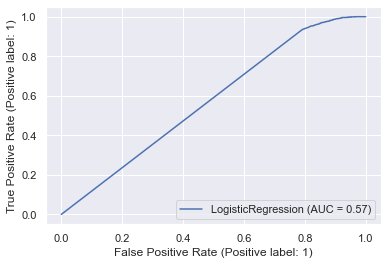

In [308]:
metrics.plot_roc_curve(logreg_adasyn, X_test, y_test)

#### Metrics for Logistic Regression - ADASYN: 
- Recall on Train: 0.76
- Recall on Test: 1.00
- Area Under the Curve: 0.57

-----------------------------

# 2.1 Decision Tree Classifier - Unsampled

In [309]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

### Creating Helper Functions

In [310]:
def get_graph(classifier):
    dot_data = StringIO()
    
    export_graphviz(classifier, out_file = dot_data, filled = True, rounded = True,
               feature_names=X.columns,
               class_names=['No Fraud', 'Fraud'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [311]:
def evaluate_model_unsampled(classifier):
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    
    print('Train set performance:')
    print(recall_score(y_train, y_train_pred))
    print(confusion_matrix(y_train, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(recall_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))

### Hyper-parameter tuning using Grid Search CV

In [312]:
dt_unsampled = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)

In [313]:
params = {
    'max_depth': [3,5,7,9,10],
    'min_samples_leaf': [50,60,70,80,110],
    'criterion': ['gini']
}

grid_search_4 = GridSearchCV(estimator=dt_unsampled,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [314]:
%%time
grid_search_4.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
CPU times: total: 4.47 s
Wall time: 1min 48s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 7, 9, 10],
                         'min_samples_leaf': [50, 60, 70, 80, 110]},
             scoring='recall', verbose=1)

In [315]:
grid_search_4.best_score_

0.33273653049141505

In [316]:
dt_best = grid_search_4.best_estimator_
evaluate_model_unsampled(dt_best)

Train set performance:
0.30982412506661927
[[966059    818]
 [  3885   1744]]
-------------------------
Test set performance:
0.2850293020777837
[[321987    305]
 [  1342    535]]


In [317]:
grid_search_4.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 70}


(process:15108): GLib-GIO-WARNING **: 16:59:26.003: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.6.2.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs

(process:15108): GLib-GIO-WARNING **: 16:59:26.020: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2304.21.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs



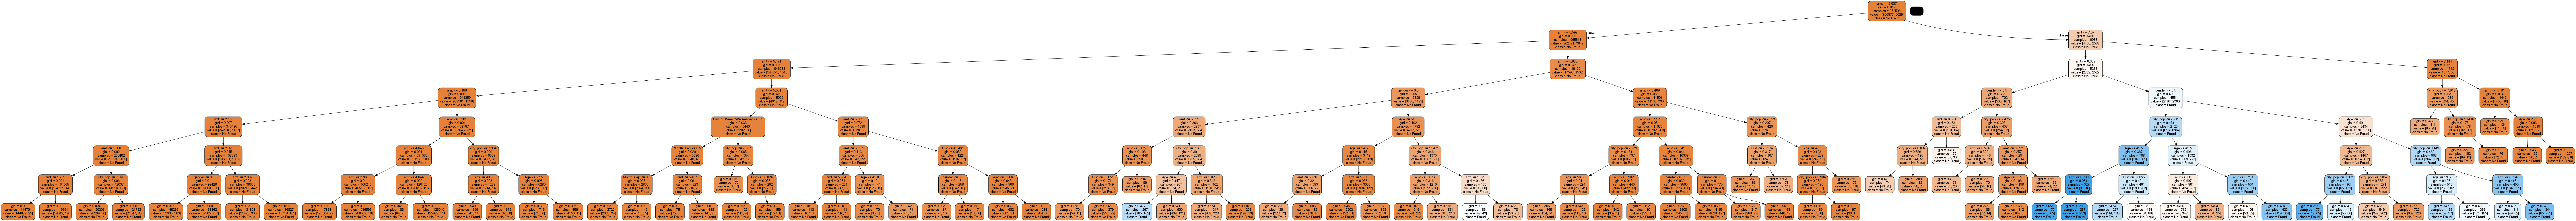

In [318]:
gph = get_graph(dt_best)
Image(gph.create_png())

#### ROC Curve

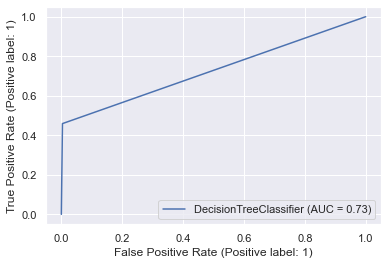

In [319]:
metrics.plot_roc_curve(dt_unsampled, X_test, y_test)

 #### Metrics for Decision Trees - Unsampled: 
- Recall on Train: 0.31
- Recall on Test: 0.29
- Area Under the Curve: 0.73

## 2.2 Decision Tree with SMOTE

In [320]:
X_train_smote, y_train_smote = SMOTE().fit_resample(X_train, y_train)

In [321]:
dt_smote = DecisionTreeClassifier(random_state=42).fit(X_train_smote,y_train_smote)

### Creating Helper Functions

In [322]:
def evaluate_model_smote(classifier):
    y_train_pred = classifier.predict(X_train_smote)
    y_test_pred = classifier.predict(X_test)
    
    print('Train set performance:')
    print(recall_score(y_train_smote, y_train_pred))
    print(confusion_matrix(y_train_smote, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(recall_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))

In [323]:
params = {
    'max_depth': [3,5,7,9,10],
    'min_samples_leaf': [50,60,70,80,110],
    'criterion': ['gini']
}

grid_search_5 = GridSearchCV(estimator=dt_smote,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [324]:
%%time
grid_search_5.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
CPU times: total: 9.58 s
Wall time: 4min 1s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 7, 9, 10],
                         'min_samples_leaf': [50, 60, 70, 80, 110]},
             scoring='recall', verbose=1)

In [325]:
grid_search_5.best_score_

0.9040146789690049

In [326]:
dt_smote = grid_search_5.best_estimator_
evaluate_model_smote(dt_smote)

Train set performance:
0.903095223073876
[[921772  45105]
 [ 93695 873182]]
-------------------------
Test set performance:
0.7469366009589771
[[307141  15151]
 [   475   1402]]


In [327]:
grid_search_5.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50}

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.364738 to fit

(process:1636): GLib-GIO-WARNING **: 17:03:57.416: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.6.2.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs

(process:1636): GLib-GIO-WARNING **: 17:03:57.416: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2304.21.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs



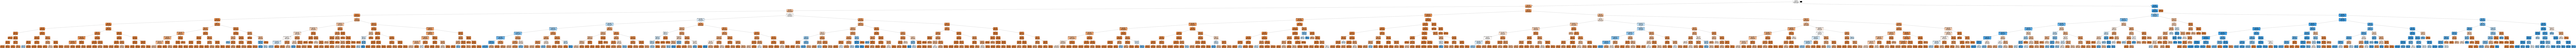

In [328]:
gph = get_graph(dt_smote)
Image(gph.create_png())

#### ROC Curve

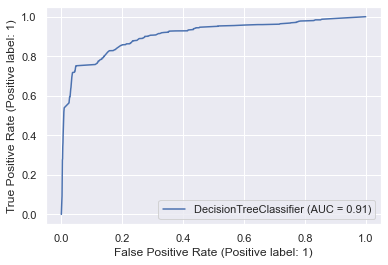

In [329]:
metrics.plot_roc_curve(dt_smote, X_test, y_test)

#### Metrics for Decision Trees - SMOTE: 
- Recall on Train: 0.92
- Recall on Test: 0.85
- Area Under the Curve: 0.94

## 2.3 Decision Tree with ADASYN

In [330]:
X_train_adasyn, y_train_adasyn = ADASYN().fit_resample(X_train, y_train)

### Creating Helper Functions

In [331]:
def evaluate_model_adasyn(classifier):
    y_train_pred = classifier.predict(X_train_adasyn)
    y_test_pred = classifier.predict(X_test)
    
    print('Train set performance:')
    print(recall_score(y_train_adasyn, y_train_pred))
    print(confusion_matrix(y_train_adasyn, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(recall_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))

In [332]:
dt_adasyn = DecisionTreeClassifier(random_state=42).fit(X_train_adasyn,y_train_adasyn)

In [333]:
params = {
    'max_depth': [3,5,7,9,10],
    'min_samples_leaf': [50,60,70,80,110],
    'criterion': ['gini']
}

grid_search_6 = GridSearchCV(estimator=dt_adasyn,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [334]:
%%time
grid_search_6.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
CPU times: total: 4.83 s
Wall time: 3min 16s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 7, 9, 10],
                         'min_samples_leaf': [50, 60, 70, 80, 110]},
             scoring='recall', verbose=1)

In [335]:
grid_search_6.best_score_

0.8920617641780421

In [336]:
dt_adasyn = grid_search_6.best_estimator_
evaluate_model_adasyn(dt_adasyn)

Train set performance:
0.8900228754242521
[[849990 116887]
 [106153 859075]]
-------------------------
Test set performance:
0.8705380927011188
[[283264  39028]
 [   243   1634]]


In [337]:
grid_search_6.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50}

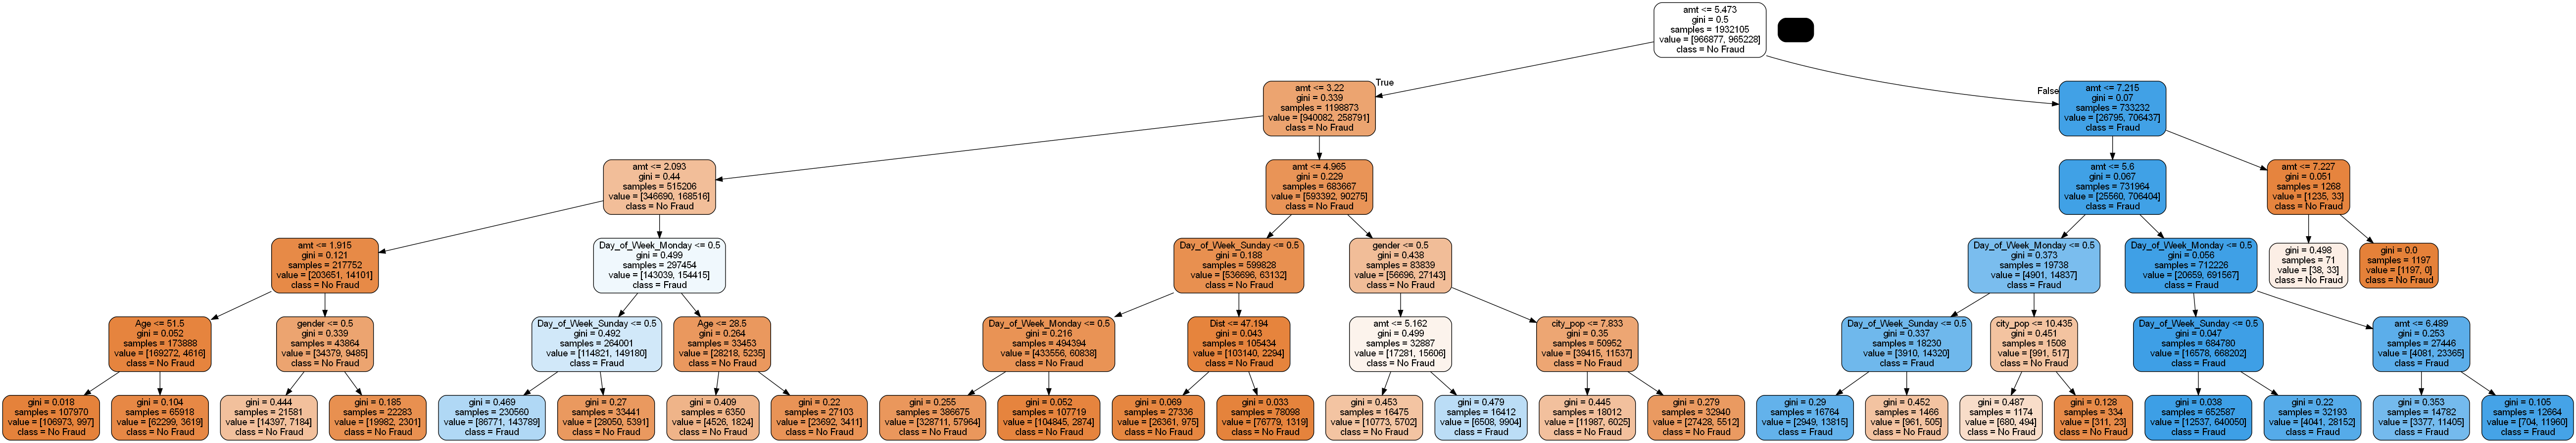

In [338]:
gph = get_graph(dt_adasyn)
Image(gph.create_png())

#### ROC Curve

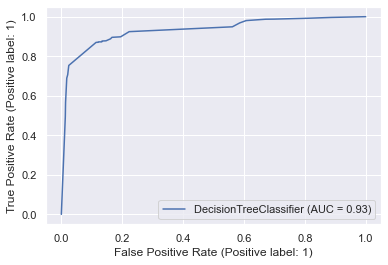

In [339]:
metrics.plot_roc_curve(dt_adasyn, X_test, y_test)

#### Metrics for Decision Trees - ADASYN: 
- Recall on Train: 0.89
- Recall on Test: 0.93
- Area Under the Curve: 0.94

---------------

# 3.1 Random Forest - Unsampled

In [340]:
from sklearn.ensemble import RandomForestClassifier

In [341]:
rf_unsampled = RandomForestClassifier(random_state=42).fit(X_train, y_train)

In [342]:
# Applying same parameters as the ones finalised in Decision Trees and building up on the n_estimators:


params = {
    'max_depth': [7,10],
    'min_samples_leaf': [50,80],
    'criterion': ['gini'],
    'n_estimators': [10,15,30]
}

grid_search_7 = GridSearchCV(estimator=rf_unsampled,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [343]:
%%time
grid_search_7.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: total: 7.98 s
Wall time: 3min 40s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [7, 10],
                         'min_samples_leaf': [50, 80],
                         'n_estimators': [10, 15, 30]},
             scoring='recall', verbose=1)

In [344]:
rf_best = grid_search_7.best_estimator_
evaluate_model_unsampled(rf_best)

Train set performance:
0.09451057026114763
[[966803     74]
 [  5097    532]]
-------------------------
Test set performance:
0.07831646244006393
[[322273     19]
 [  1730    147]]


In [345]:
grid_search_7.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 50,
 'n_estimators': 10}

#### ROC Curve

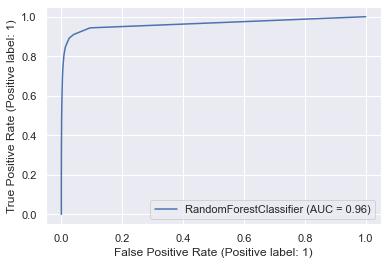

In [346]:
metrics.plot_roc_curve(rf_unsampled, X_test, y_test)

 #### Metrics for Random Forest - Unsampled: 
- Recall on Train: 0.09
- Recall on Test: 0.08
- Area Under the Curve: 0.96

# 3.2 Random Forest - SMOTE

In [347]:
rf_smote = RandomForestClassifier(random_state=42).fit(X_train_smote, y_train_smote)

In [348]:
params = {
    'max_depth': [7,10],
    'min_samples_leaf': [50,80],
    'criterion': ['gini'],
    'n_estimators': [10,15,30]
}

grid_search_8 = GridSearchCV(estimator=rf_smote,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [349]:
%%time
grid_search_8.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: total: 45.5 s
Wall time: 8min 24s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [7, 10],
                         'min_samples_leaf': [50, 80],
                         'n_estimators': [10, 15, 30]},
             scoring='recall', verbose=1)

In [350]:
rf_smote = grid_search_8.best_estimator_
evaluate_model_smote(rf_smote)

Train set performance:
0.9005726684986818
[[938068  28809]
 [ 96134 870743]]
-------------------------
Test set performance:
0.7549280767181673
[[312630   9662]
 [   460   1417]]


In [351]:
grid_search_8.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 80,
 'n_estimators': 30}

#### ROC Curve

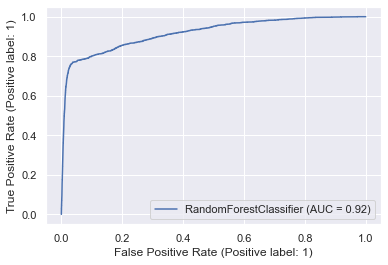

In [352]:
metrics.plot_roc_curve(rf_smote, X_test, y_test)

#### Metrics for Random Forest - SMOTE: 
- Recall on Train: 0.90
- Recall on Test: 0.75
- Area Under the Curve: 0.92

# 3.3 Random Forest - ADASYN

In [353]:
rf_adasyn = RandomForestClassifier(random_state=42).fit(X_train_adasyn, y_train_adasyn)

In [354]:
# Applying same parameters as the ones finalised in Decision Trees and building up on the n_estimators:

params = {
    'max_depth': [7,10],
    'min_samples_leaf': [50,80],
    'criterion': ['gini'],
    'n_estimators': [10,15,30]
}

grid_search_9 = GridSearchCV(estimator=rf_adasyn,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [355]:
%%time
grid_search_9.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: total: 42.3 s
Wall time: 7min 21s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [7, 10],
                         'min_samples_leaf': [50, 80],
                         'n_estimators': [10, 15, 30]},
             scoring='recall', verbose=1)

In [356]:
grid_search_9.best_score_

0.8943969604279924

In [357]:
rf_adasyn = grid_search_9.best_estimator_
evaluate_model_adasyn(rf_adasyn)

Train set performance:
0.897439775887148
[[934215  32662]
 [ 98994 866234]]
-------------------------
Test set performance:
0.7709110282365477
[[311387  10905]
 [   430   1447]]


In [358]:
grid_search_9.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 80,
 'n_estimators': 30}

#### ROC Curve

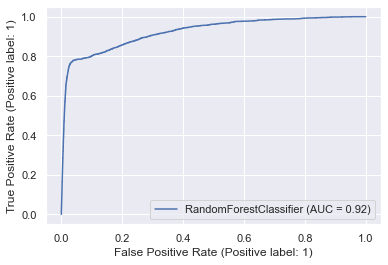

In [359]:
metrics.plot_roc_curve(rf_adasyn, X_test, y_test)

 #### Metrics for Random Forest - ADASYN: 
- Recall on Train: 0.90
- Recall on Test: 0.77
- Area Under the Curve: 0.92

-----

# `Testing the results on the unseen Test Data:`

In [360]:
fraudTrain.head()

amt  gender  city_pop  Age        Dist  Day_of_Week_Monday  \
0  1.603420       1  8.159089   31   10.509708                   0   
1  4.674976       1  5.003946   41   30.171468                   0   
2  5.394127       0  8.331827   57  107.746268                   0   
3  3.806662       0  7.569928   52   97.629363                   0   
4  3.736717       0  4.595120   33   66.236025                   0   

   Day_of_Week_Saturday  Day_of_Week_Sunday  Day_of_Week_Thursday  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   0                     0   

   Day_of_Week_Tuesday  ...  Month_Dec  Month_Feb  Month_Jan  Month_Jul  \
0                    1  ...          0          0          1          0   
1                    1  ...          0          0          1          0   
2                    1  ...          0          0          1          0   
3                    1  ...          0          0          1          0   
4                    1  ...          0          0          1          0   

   Month_Jun  Month_Mar  Month_May  Month_Nov  Month_Oct  Month_Sep  
0          0          0          0          0          0          0  
1          0          0          0          0          0          0  
2          0          0          0          0          0          0  
3          0          0          0          0          0          0  
4          0          0          0          0          0          0  

[5 rows x 22 columns]

In [361]:
fraudTest.head()

amt  gender   city_pop  is_fraud  Age        Dist  Day_of_Week_Monday  \
0  1.050822       0  12.717389         0   52   24.748687                   0   
1  3.395850       1   5.710427         0   30   98.988771                   0   
2  3.720378       1  10.448599         0   50   73.344386                   0   
3  4.095178       0  10.910843         0   33   27.746011                   0   
4  1.160021       0   7.026427         0   65  105.772207                   0   

   Day_of_Week_Saturday  Day_of_Week_Sunday  Day_of_Week_Thursday  ...  \
0                     0                   1                     0  ...   
1                     0                   1                     0  ...   
2                     0                   1                     0  ...   
3                     0                   1                     0  ...   
4                     0                   1                     0  ...   

   Month_Dec  Month_Feb  Month_Jan  Month_Jul  Month_Jun  Month_Mar  \
0          0          0          0          0          1          0   
1          0          0          0          0          1          0   
2          0          0          0          0          1          0   
3          0          0          0          0          1          0   
4          0          0          0          0          1          0   

   Month_May  Month_Nov  Month_Oct  Month_Sep  
0          0          0          0          0  
1          0          0          0          0  
2          0          0          0          0  
3          0          0          0          0  
4          0          0          0          0  

[5 rows x 23 columns]

## `Model Selection and Model Building`
Based on the Recall scores, AUC Scores, and Confusion Matrices collected from the 9 algorithms (3 algorithms - unsampled and 6 
sampled), following is the summary of all values to help us pick the best model of all:

In [399]:
summary_dict = {
    'Model': ['Logistic Regression - Unsampled', 'Logistic Regression - SMOTE', 'Logistic Regression - ADASYN',
             'Decision Trees - Unsampled', 'Decision Trees - SMOTE', 'Decision Trees - ADASYN',
             'Random Forest - Unsampled', 'Random Forest - SMOTE', 'Random Forest - ADASYN'],
    'Recall on Train' : [0.00,0.80,0.76,0.31,0.90,0.89,0.09,0.90,0.90],
    'Recall on Test' : [1.00,1.00,1.00,0.29,0.75,0.87,0.08,0.75,0.77],
    'AUC Score' : [0.51,0.56,0.57,0.73,0.91,0.93,0.96,0.92,0.92]
}

summary_df = pd.DataFrame(summary_dict)
summary_df

Model  Recall on Train  Recall on Test  AUC Score
0  Logistic Regression - Unsampled             0.00            1.00       0.51
1      Logistic Regression - SMOTE             0.80            1.00       0.56
2     Logistic Regression - ADASYN             0.76            1.00       0.57
3       Decision Trees - Unsampled             0.31            0.29       0.73
4           Decision Trees - SMOTE             0.90            0.75       0.91
5          Decision Trees - ADASYN             0.89            0.87       0.93
6        Random Forest - Unsampled             0.09            0.08       0.96
7            Random Forest - SMOTE             0.90            0.75       0.92
8           Random Forest - ADASYN             0.90            0.77       0.92

In [400]:
summary_df.sort_values('AUC Score', ascending = False)

Model  Recall on Train  Recall on Test  AUC Score
6        Random Forest - Unsampled             0.09            0.08       0.96
5          Decision Trees - ADASYN             0.89            0.87       0.93
7            Random Forest - SMOTE             0.90            0.75       0.92
8           Random Forest - ADASYN             0.90            0.77       0.92
4           Decision Trees - SMOTE             0.90            0.75       0.91
3       Decision Trees - Unsampled             0.31            0.29       0.73
2     Logistic Regression - ADASYN             0.76            1.00       0.57
1      Logistic Regression - SMOTE             0.80            1.00       0.56
0  Logistic Regression - Unsampled             0.00            1.00       0.51

### Based on the AUC Scores & Recall on Train and Test, checking the final test dataset

In [364]:
# Splitting the test data into X and y:

y_final = fraudTest.pop('is_fraud')
X_final = fraudTest

### Testing the unseen data by using Decision Tree - SMOTE Modelled Predictors:

In [365]:
y_pred_final_dt = dt_smote.predict(X_final)
print(recall_score(y_final, y_pred_final_dt))
print(confusion_matrix(y_final, y_pred_final_dt))

0.6750582750582751
[[529164  24410]
 [   697   1448]]


`Decision Tree - SMOTE has a 67.5% recall score`

### Testing the unseen data by using Decision Tree - ADASYN Modelled Predictors:

In [366]:
y_pred_final_dt_ = dt_adasyn.predict(X_final)
print(recall_score(y_final, y_pred_final_dt_))
print(confusion_matrix(y_final, y_pred_final_dt_))

0.8522144522144522
[[485593  67981]
 [   317   1828]]


`Decision Tree - ADASYN has a 85.22% recall score`

### Testing the unseen data by using Random Forest - SMOTE Modelled Predictors:

In [367]:
y_pred_final_rf = rf_smote.predict(X_final)
print(recall_score(y_final, y_pred_final_rf))
print(confusion_matrix(y_final, y_pred_final_rf))

0.7114219114219115
[[540635  12939]
 [   619   1526]]


`Random Forest - SMOTE has a 71.14% recall score`

### Testing the unseen data by using Random Forest - ADASYN Modelled Predictors:

In [368]:
y_pred_final_rf_ = rf_adasyn.predict(X_final)
print(recall_score(y_final, y_pred_final_rf_))
print(confusion_matrix(y_final, y_pred_final_rf_))

0.7216783216783217
[[538542  15032]
 [   597   1548]]


`Random Forest - ADASYN has a 72.17% recall score`

------

 ## Decision Trees - ADASYN model is the best as it has 85.22% Sensitivity towards predicting Fraudulent Transactions

In [369]:
# Let us check the confusion matrix for this test data:

cnf = confusion_matrix(y_final, y_pred_final_dt_)
cnf

array([[485593,  67981],
       [   317,   1828]], dtype=int64)

In [370]:
# Creating a dataframe to compare the actual v/s predicted values of y:

y_pred_final_dt_ = pd.Series(y_pred_final_dt_)
df_pred = pd.concat([X_final, y_final,y_pred_final_dt_], axis = 1)
df_pred.rename(columns = {0:'y_pred'}, inplace = True)
df_pred.head()

amt  gender   city_pop  Age        Dist  Day_of_Week_Monday  \
0  1.050822       0  12.717389   52   24.748687                   0   
1  3.395850       1   5.710427   30   98.988771                   0   
2  3.720378       1  10.448599   50   73.344386                   0   
3  4.095178       0  10.910843   33   27.746011                   0   
4  1.160021       0   7.026427   65  105.772207                   0   

   Day_of_Week_Saturday  Day_of_Week_Sunday  Day_of_Week_Thursday  \
0                     0                   1                     0   
1                     0                   1                     0   
2                     0                   1                     0   
3                     0                   1                     0   
4                     0                   1                     0   

   Day_of_Week_Tuesday  ...  Month_Jan  Month_Jul  Month_Jun  Month_Mar  \
0                    0  ...          0          0          1          0   
1                    0  ...          0          0          1          0   
2                    0  ...          0          0          1          0   
3                    0  ...          0          0          1          0   
4                    0  ...          0          0          1          0   

   Month_May  Month_Nov  Month_Oct  Month_Sep  is_fraud  y_pred  
0          0          0          0          0         0       0  
1          0          0          0          0         0       0  
2          0          0          0          0         0       0  
3          0          0          0          0         0       0  
4          0          0          0          0         0       0  

[5 rows x 24 columns]

In [371]:
# Extracting only the fraudulent transactions from this test dataset:

fraud_df = df_pred[df_pred.is_fraud==1]
fraud_df.head()

amt  gender   city_pop  Age       Dist  Day_of_Week_Monday  \
1685  3.212455       1   3.135494   51  80.136594                   0   
1767  6.659960       0   7.174724   62  12.776135                   0   
1781  6.430252       0   7.174724   62  24.637848                   0   
1784  6.982575       0  11.175142   26  98.706628                   0   
1857  6.736552       1   3.135494   51  60.505374                   0   

      Day_of_Week_Saturday  Day_of_Week_Sunday  Day_of_Week_Thursday  \
1685                     0                   1                     0   
1767                     0                   1                     0   
1781                     0                   1                     0   
1784                     0                   1                     0   
1857                     0                   1                     0   

      Day_of_Week_Tuesday  ...  Month_Jan  Month_Jul  Month_Jun  Month_Mar  \
1685                    0  ...          0          0          1          0   
1767                    0  ...          0          0          1          0   
1781                    0  ...          0          0          1          0   
1784                    0  ...          0          0          1          0   
1857                    0  ...          0          0          1          0   

      Month_May  Month_Nov  Month_Oct  Month_Sep  is_fraud  y_pred  
1685          0          0          0          0         1       0  
1767          0          0          0          0         1       1  
1781          0          0          0          0         1       1  
1784          0          0          0          0         1       1  
1857          0          0          0          0         1       1  

[5 rows x 24 columns]

### Let's check the AUC on the final test data

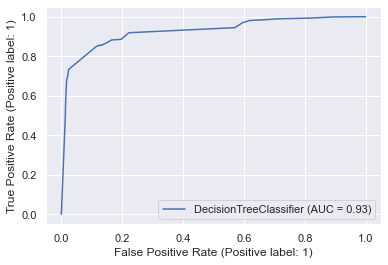

In [372]:
metrics.plot_roc_curve(dt_adasyn, X_final, y_final)

`Area Under the Curve is 0.91`

-----

 # `Cost Benefit Analysis`
- The Cost Benefit Analysis is to be done on the original data
- Merging the train and test data to make an original dataframe

In [386]:
# Let us merge the dataset to form the original

fraud = pd.concat([df_train, df_test], axis=0)
fraud.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

#### Let us take a look at what we need to do in order to perform the cost-benefit analysis step by step:
- ### Part I: Analyse the dataset and find the following figures:

 1. Average number of transactions per month 
 2. Average number of fraudulent transactions per month
 3. Average amount per fraudulent transaction 

In [387]:
# Since the given (original) dataset is from Jan 1 2019 to Dec 31 2020, the data is of 24 months
# Total transactions can be found by checking the shape of the original dataframe
# Avg transactions per month would be to divide that shape/total by 24 (months)

avg_transactions_pm = fraud.shape[0]//24

In [388]:
print("1. Average number of transactions per month are:", avg_transactions_pm)

1. Average number of transactions per month are: 77183


In [389]:
# Checking only for fraudulent transactions:

fraud[fraud.is_fraud == 1]

Unnamed: 0 trans_date_trans_time            cc_num  \
2449          2449   2019-01-02 01:06:37     4613314721966   
2472          2472   2019-01-02 01:47:29   340187018810220   
2523          2523   2019-01-02 03:05:23   340187018810220   
2546          2546   2019-01-02 03:38:03     4613314721966   
2553          2553   2019-01-02 03:55:47   340187018810220   
...            ...                   ...               ...   
517197      517197   2020-12-22 22:05:48  2242176657877538   
517274      517274   2020-12-22 22:18:07  2242176657877538   
517341      517341   2020-12-22 22:31:48  2242176657877538   
517529      517529   2020-12-22 23:06:03  2242176657877538   
517571      517571   2020-12-22 23:13:39  2242176657877538   

                                   merchant       category      amt   first  \
2449                 fraud_Rutherford-Mertz    grocery_pos   281.06   Jason   
2472       fraud_Jenkins, Hauck and Friesen  gas_transport    11.52   Misty   
2523                 fraud_Goodwin-Nitzsche    grocery_pos   276.31   Misty   
2546                 fraud_Erdman-Kertzmann  gas_transport     7.03   Jason   
2553                     fraud_Koepp-Parker    grocery_pos   275.73   Misty   
...                                     ...            ...      ...     ...   
517197      fraud_Willms, Kris and Bergnaum   shopping_pos  1041.51  Travis   
517274                       fraud_Kuhn LLC   shopping_pos   868.09  Travis   
517341  fraud_Mosciski, Ziemann and Farrell   shopping_net  1039.42  Travis   
517529                   fraud_Bauch-Raynor    grocery_pos   289.27  Travis   
517571           fraud_Jaskolski-Vandervort       misc_net   766.38  Travis   

          last gender                       street  ...      lat     long  \
2449    Murphy      M    542 Steve Curve Suite 011  ...  35.9946 -81.7266   
2472      Hart      F    27954 Hall Mill Suite 575  ...  29.4400 -98.4590   
2523      Hart      F    27954 Hall Mill Suite 575  ...  29.4400 -98.4590   
2546    Murphy      M    542 Steve Curve Suite 011  ...  35.9946 -81.7266   
2553      Hart      F    27954 Hall Mill Suite 575  ...  29.4400 -98.4590   
...        ...    ...                          ...  ...      ...      ...   
517197  Daniel      M  1327 Rose Causeway Apt. 610  ...  34.6323 -89.8855   
517274  Daniel      M  1327 Rose Causeway Apt. 610  ...  34.6323 -89.8855   
517341  Daniel      M  1327 Rose Causeway Apt. 610  ...  34.6323 -89.8855   
517529  Daniel      M  1327 Rose Causeway Apt. 610  ...  34.6323 -89.8855   
517571  Daniel      M  1327 Rose Causeway Apt. 610  ...  34.6323 -89.8855   

        city_pop                       job         dob  \
2449         885            Soil scientist  1988-09-15   
2472     1595797  Horticultural consultant  1960-10-28   
2523     1595797  Horticultural consultant  1960-10-28   
2546         885            Soil scientist  1988-09-15   
2553     1595797  Horticultural consultant  1960-10-28   
...          ...                       ...         ...   
517197     14462    Database administrator  1959-03-03   
517274     14462    Database administrator  1959-03-03   
517341     14462    Database administrator  1959-03-03   
517529     14462    Database administrator  1959-03-03   
517571     14462    Database administrator  1959-03-03   

                               trans_num   unix_time  merch_lat merch_long  \
2449    e8a81877ae9a0a7f883e15cb39dc4022  1325466397  36.430124 -81.179483   
2472    bc7d41c41103877b03232f03f1f8d3f5  1325468849  29.819364 -99.142791   
2523    b98f12f4168391b2203238813df5aa8c  1325473523  29.273085 -98.836360   
2546    397894a5c4c02e3c61c784001f0f14e4  1325475483  35.909292 -82.091010   
2553    7863235a750d73a244c07f1fb7f0185a  1325476547  29.786426 -98.683410   
...                                  ...         ...        ...        ...   
517197  35b0297dd026d2e9a75d024a5dec7955  1387749948  34.573471 -89.911011   
517274  da7f67d7375f10a054a3d919448c45dd  1387750687  34.091227 -90.

In [390]:
# Fraudulent transactions are 9651 (number of rows) that are spread across 24 months
# Avg fraudulent transactions per month would be to divide the shape/total fraudulent rows by 24 (months)

avg_fraudtrans_pm = fraud[fraud.is_fraud == 1].shape[0]//24

In [391]:
print("2. Average number of fraudulent transactions per month are:", avg_fraudtrans_pm)

2. Average number of fraudulent transactions per month are: 402


In [392]:
# Average amount of fraud is the total fraudulent amount divided by the total number of fraudulent transactions

avg_fraud_amt = fraud[fraud.is_fraud == 1].amt.sum()//fraud[fraud.is_fraud == 1].shape[0]

In [393]:
print("3. Average amount per fraudulent transactions is:", avg_fraud_amt)

3. Average amount per fraudulent transactions is: 530.0


- ### Part II: Compare the cost incurred per month by the bank before and after the model deployment:

1. Cost incurred per month before the model was deployed = Average amount per fraudulent transaction * Average number of fraudulent transactions per month
2. Cost incurred per month after the model is built and deployed: (Use the test metric from the model evaluation part and the calculations performed in Part I to compute the values given below)
 

- Let TF be the average number of transactions per month detected as fraudulent by the model and let the cost of providing customer executive support per fraudulent transaction detected by the model = USD 1.5

- Total cost of providing customer support per month for fraudulent transactions detected by the model = 1.5 * TF.
- Let FN be the average number of transactions per month that are fraudulent but not detected by the model 

- Cost incurred due to these fraudulent transactions left undetected by the model = Average amount per fraudulent transaction * FN
- Therefore, the cost incurred per month after the model is built and deployed = 1.5 * TF + Average amount per fraudulent transaction * FN
- Final savings = Cost incurred before - Cost incurred after

In [394]:
# Calculating the cost incurred before deploying the model based on the first point descibed above:

cost_before_model = avg_fraud_amt*avg_fraudtrans_pm
cost_before_model

213060.0

In [403]:
# Let TF be the average number of transactions per month detected as fraudulent by the model 
# Since the test dataframe has 7 months data, dividing by 7

TF = fraud_df.y_pred.sum()//7
print(TF)
print("Total cost of providing customer support per month for fraudulent transactions detected by the model =", TF*1.5)

261
Total cost of providing customer support per month for fraudulent transactions detected by the model = 391.5


In [404]:
# Let FN be the average number of transactions per month that are fraudulent but not detected by the model
# Since the test dataframe has 7 months data, dividing by 7

FN = fraud_df[fraud_df.y_pred==0].is_fraud.sum()//7
print(FN)
print("Cost incurred due to these fraudulent transactions left undetected by the model =", FN*avg_fraud_amt)

45
Cost incurred due to these fraudulent transactions left undetected by the model = 23850.0


In [406]:
# Cost incurred after the model is deployed:

cost_after_model = (TF*1.5) + (FN*avg_fraud_amt)
cost_after_model

24241.5

In [407]:
# Final savings = Cost incurred before - Cost incurred after

Final_Savings = int(cost_before_model - cost_after_model)
print("Final Savings after deploying the model are: $",Final_Savings)

Final Savings after deploying the model are: $ 188818


----